In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Problem 1 - Basic Image Processing (25 points)

a. (1 point) Read the "balloons.jpg" image and display it in a new window.

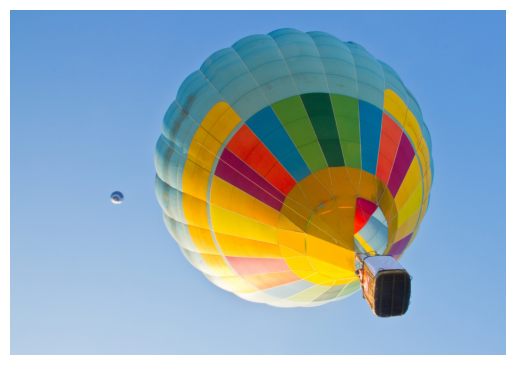

In [2]:
img = mpimg.imread('images/balloons.jpg')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

b. (3 points) Extract the Red, Green, and Blue color channels from the image and show
these three color component images along with the original image in a 2x2 grid with
labels.

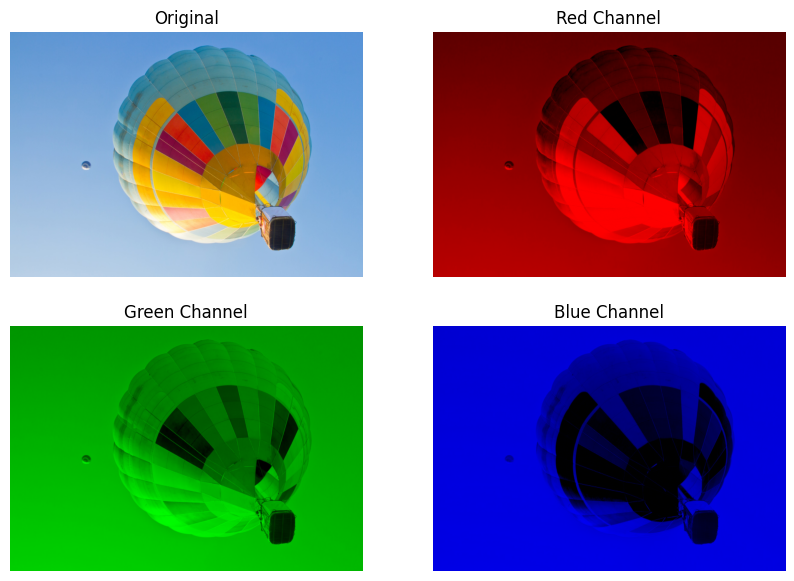

In [7]:
img = mpimg.imread('images/balloons.jpg')
r = img.copy()
g = img.copy()
b = img.copy()

r[:, :, 1] = 0
r[:, :, 2] = 0
g[:, :, 0] = 0
g[:, :, 2] = 0
b[:, :, 0] = 0
b[:, :, 1] = 0

fig = plt.figure(figsize=(10, 7))
im1 = fig.add_subplot(2,2,1)
im2 = fig.add_subplot(2,2,2)
im3 = fig.add_subplot(2,2,3)
im4 = fig.add_subplot(2,2,4)
im1.axis('off')
im2.axis('off')
im3.axis('off')
im4.axis('off')
im1.title.set_text('Original')
im2.title.set_text('Red Channel')
im3.title.set_text('Green Channel')
im4.title.set_text('Blue Channel')
im1.imshow(img)
im2.imshow(r)
im3.imshow(g)
im4.imshow(b)

plt.show()

c. (5 points) YUV is an older color space described in Module - 1, with the equations to
compute Y, U and V from RGB. Convert the original image to YUV format, i.e. generate
three images of Y, U and V components separately by using the converting equation.
Display all three of these images side-by-side.

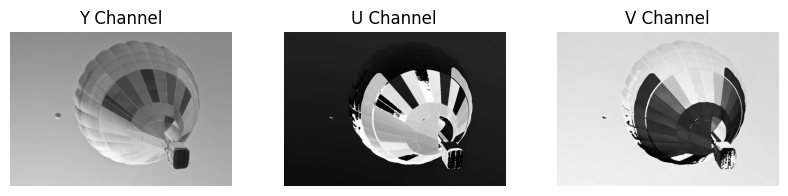

In [9]:
yuv = mpimg.imread('images/balloons.jpg').copy()
yuv[:, :, 0] = 0.299 * img[:, :, 0] + 0.587 * img[:, :, 1] + 0.114 * img[:, :, 2]
yuv[:, :, 1] = -0.147 * img[:, :, 0] - 0.289 * img[:, :, 1] + 0.436 * img[:, :, 2]
yuv[:, :, 2] = 0.615 * img[:, :, 0] - 0.515 * img[:, :, 1] - 0.100 * img[:, :, 2]

fig = plt.figure(figsize=(10, 2))
im1 = fig.add_subplot(1,3,1)
im2 = fig.add_subplot(1,3,2)
im3 = fig.add_subplot(1,3,3)
im1.axis('off')
im2.axis('off')
im3.axis('off')
im1.title.set_text('Y Channel')
im2.title.set_text('U Channel')
im3.title.set_text('V Channel')
im1.imshow(yuv[:, :, 0], cmap='gray', vmin=0, vmax=255)
im2.imshow(yuv[:, :, 1], cmap='gray', vmin=0, vmax=255)
im3.imshow(yuv[:, :, 2], cmap='gray', vmin=0, vmax=255)
plt.show()

d. (5 points) Convert the original image to grayscale image. Write your own function to
create the grayscale from the color image. Create 4 different images each with different
color intensity weightings, one of which should have equal color intensity weighting for R,
G and B. Display these 4 images in a 2x2 grid with labels.

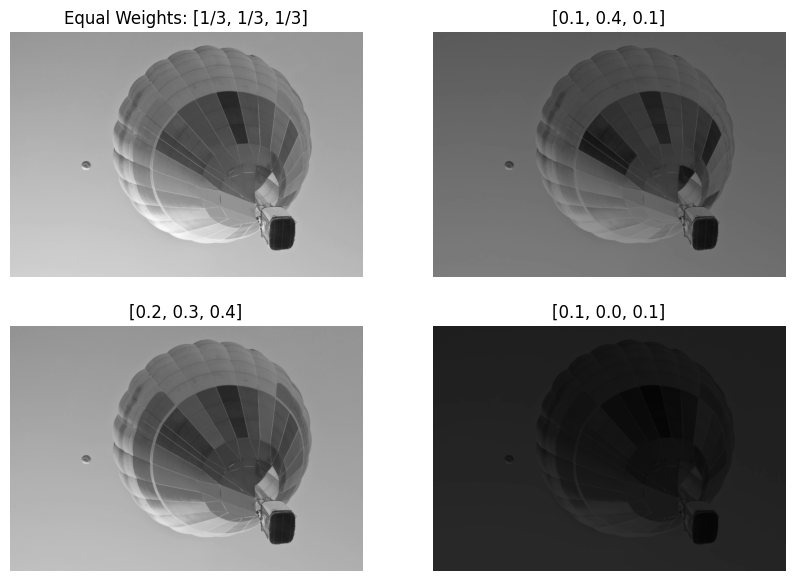

In [2]:
def grayscale(img, weights=[1/3, 1/3, 1/3]):
    gray = np.zeros((img.shape[0], img.shape[1]))
    gray[:] = weights[0] * img[:, :, 0] + weights[1] * img[:, :, 1] + weights[2] * img[:, :, 2]
    return gray

img = mpimg.imread('images/balloons.jpg')

fig = plt.figure(figsize=(10, 7))
im1 = fig.add_subplot(2,2,1)
im2 = fig.add_subplot(2,2,2)
im3 = fig.add_subplot(2,2,3)
im4 = fig.add_subplot(2,2,4)
im1.axis('off')
im2.axis('off')
im3.axis('off')
im4.axis('off')
im1.title.set_text('Equal Weights: [1/3, 1/3, 1/3]')
im2.title.set_text('[0.1, 0.4, 0.1]')
im3.title.set_text('[0.2, 0.3, 0.4]')
im4.title.set_text('[0.1, 0.0, 0.1]')
im1.imshow(grayscale(img, [1/3, 1/3, 1/3]), cmap='gray', vmin=0, vmax=255)
im2.imshow(grayscale(img, [0.1, 0.4, 0.1]), cmap='gray', vmin=0, vmax=255)
im3.imshow(grayscale(img, [0.2, 0.3, 0.4]), cmap='gray', vmin=0, vmax=255)
im4.imshow(grayscale(img, [0.1, 0.0, 0.1]), cmap='gray', vmin=0, vmax=255)
plt.show()

e. (4 points) Rotate the top left quarter of the image by 180 degrees. You cannot use the
built-in function imrotate or equivalents. Display the updated image in a new window.

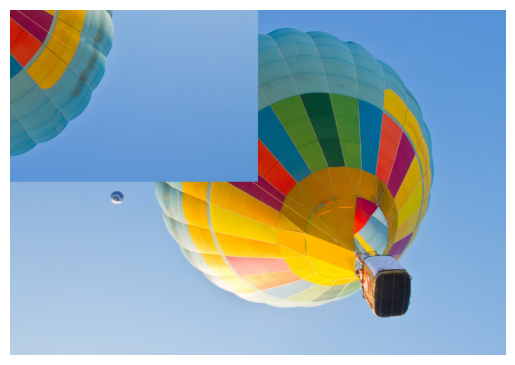

In [11]:
def rotate_top_left(img):
    rotated = img.copy()
    rows = img.shape[0]
    cols = img.shape[1]
    # swap rows
    for i in range(int(rows / 2)):
        for j in range(int(cols / 2)):
            rotated[i, j, :] = img[int(rows / 2) - i - 1, j, :]
    temp = rotated.copy()
    # swap columns
    for i in range(int(rows / 2)):
        for j in range(int(cols / 2)):
            rotated[i, j, :] = temp[i, int(cols / 2) - j - 1, :]
    return rotated

img = mpimg.imread('images/balloons.jpg')
imgplot = plt.imshow(rotate_top_left(img))
plt.axis('off')
plt.show()

f. (4 points) Flip the original image horizontally (along the central vertical axis) and
vertically. Display the original image and the two flipped images in a 1x3 grid with labels.
You cannot use the built-in functions fliplr and flipud or equivalents.

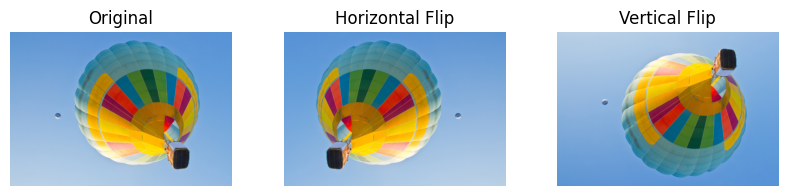

In [12]:
def flip_horizontal(img):
    flipped = img.copy()
    rows = img.shape[0]
    cols = img.shape[1]
    # swap cols
    for i in range(rows):
        for j in range(cols):
            flipped[i, j, :] = img[i, cols - j - 1, :]
    return flipped

def flip_vertical(img):
    flipped = img.copy()
    rows = img.shape[0]
    cols = img.shape[1]
    # swap rows
    for i in range(rows):
        for j in range(cols):
            flipped[i, j, :] = img[rows - i - 1, j, :]
    return flipped

img = mpimg.imread('images/balloons.jpg')
fig = plt.figure(figsize=(10, 2))
im1 = fig.add_subplot(1,3,1)
im2 = fig.add_subplot(1,3,2)
im3 = fig.add_subplot(1,3,3)
im1.axis('off')
im2.axis('off')
im3.axis('off')
im1.title.set_text('Original')
im2.title.set_text('Horizontal Flip')
im3.title.set_text('Vertical Flip')
im1.imshow(img)
im2.imshow(flip_horizontal(img))
im3.imshow(flip_vertical(img))
plt.show()

g) (4 points) Implement a color filter that emphasizes a specific color (e.g., blue, red, or
green) in the image. Apply the filter and display the result.

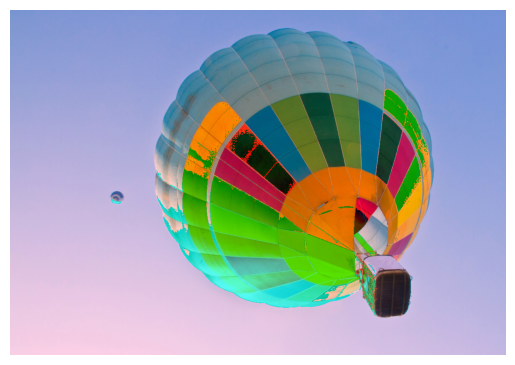

In [56]:
img = mpimg.imread('images/balloons.jpg').copy().astype('float64')
img[:, :, 0] *= 1.35
imgplot = plt.imshow(img.astype('uint8'))
plt.axis('off')
plt.show()

h) (4 points) Apply a custom color enhancement technique of your choice to enhance the
visual appeal of the image. Explain the technique and its effects. Display the enhanced
color image and provide a brief description of the enhancement.

## Problem 2 - Histogram Manipulation (25 points)

a. (2 points) Read the image in grayscale. Compute and plot the histogram of the image
using hist and bar, and display it in a new window with a label. You are not allowed to
use the imhist inbuilt function. Is the image underexposed or overexposed?

Answer: The image is under exposed since most of our gray levels are on the low end of our histogram.

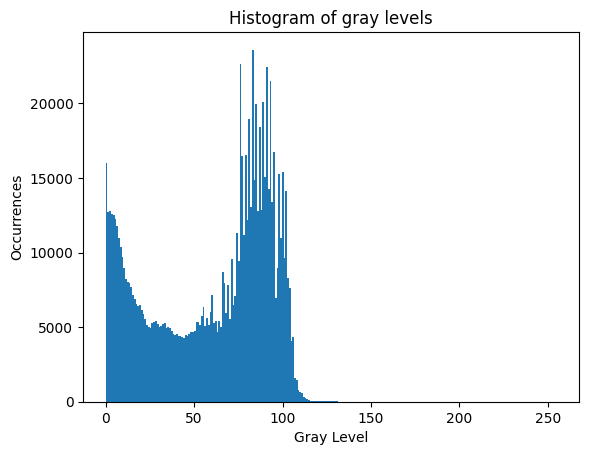

In [14]:
def histogram(img):
    histogram = np.zeros(256)
    rows = img.shape[0]
    cols = img.shape[1]
    for i in range(rows):
        for j in range(cols):
            histogram[img[i][j]] += 1
    return histogram

img = mpimg.imread('images/q2.jpg')
plt.hist(list(range(0, 256)), weights=histogram(img), bins=256)
plt.title('Histogram of gray levels')
plt.xlabel('Gray Level')
plt.ylabel('Occurrences')
plt.show()

b. (5 points) You need to now implement the FSCS algorithm taught in Module-2. Write a
function “func_fscs(image)”, which takes the input as the original image and gives
output as the enhanced/processed image. Pass q2.jpg through the function, and display
the original image, original histogram, processed image and processed histogram in a
2x2 grid with labels.

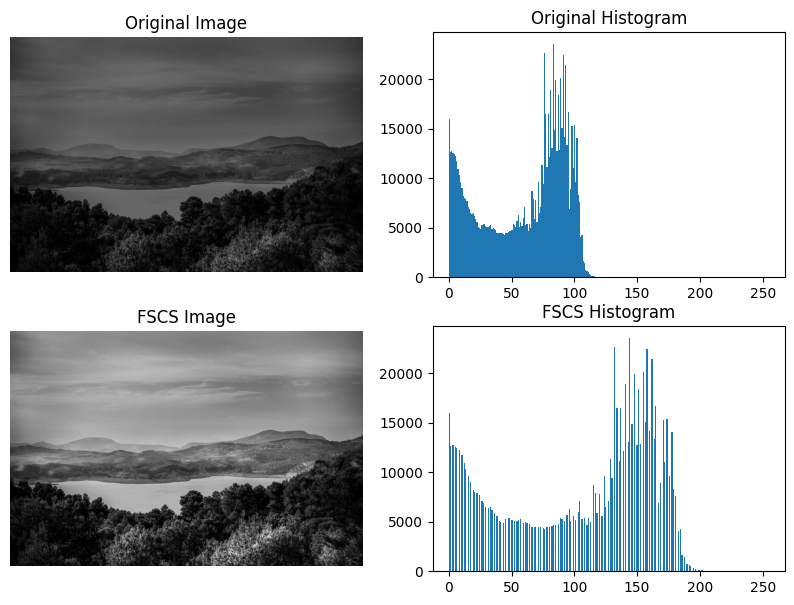

In [15]:
def func_fscs(img):
    A = np.amin(img)
    B = np.amax(img)
    P = (256 - 1) / (B - A)
    L = -A * (256 - 1) / (B - A)
    rows = img.shape[0]
    cols = img.shape[1]
    fscs_img = img.copy()
    for i in range(rows):
        for j in range(cols):
            fscs_img[i][j] = P * fscs_img[i][j] + L
    return fscs_img


img = mpimg.imread('images/q2.jpg')
hist = histogram(img)
fscs_img = func_fscs(img)
fscs_hist = histogram(fscs_img)
fig = plt.figure(figsize=(10, 7))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
ax1.axis('off')
ax3.axis('off')
ax1.title.set_text('Original Image')
ax2.title.set_text('Original Histogram')
ax3.title.set_text('FSCS Image')
ax4.title.set_text('FSCS Histogram')
ax1.imshow(img, cmap='gray', vmin=0, vmax=255)
ax2.hist(list(range(0, 256)), weights=hist, bins=256)
ax3.imshow(fscs_img, cmap='gray', vmin=0, vmax=255)
ax4.hist(list(range(0, 256)), weights=fscs_hist, bins=256)
plt.show()


c. (5 points) You need to now implement the logarithmic contrast compression. Write a
function “func_logContCompression(image)”, which takes the input as the original
image and gives output as the logarithmic contrast compressed image. Take q2.jpg,
pass it through “func_logContCompression(image)”, and pass the output of this
function through “func_fscs(image)” (FSCS algorithm). Display the logarithmic contrast
compressed image, its histogram, the final image after passing through both the
functions and its histogram in a 2x2 grid with labels.

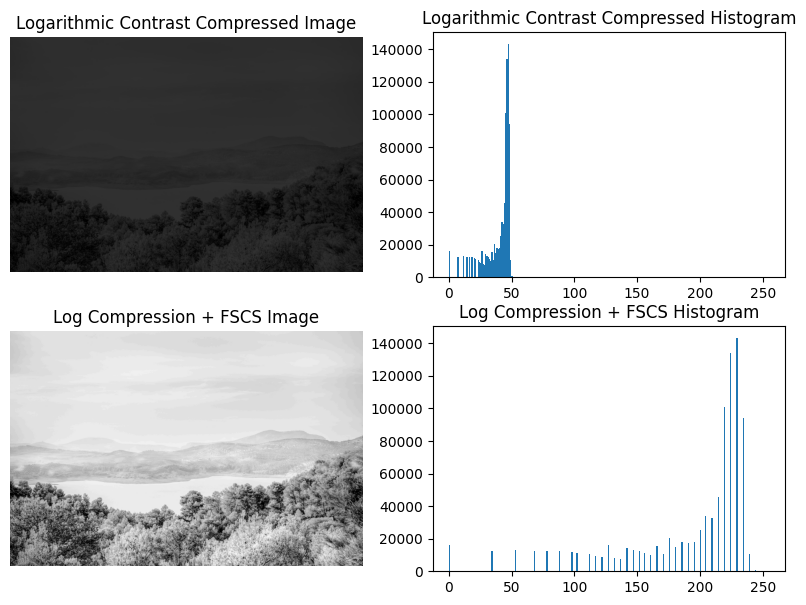

In [18]:
def func_logContCompression(img, base):
    # using change of base formula, allow log compression to arbitrary base
    return (np.log(1 + img) / np.log(base)).astype(int)

img = mpimg.imread('images/q2.jpg')
log_img = func_logContCompression(img, 1.1)
log_hist = histogram(log_img)
fscs_img = func_fscs(log_img)
fscs_hist = histogram(fscs_img)
fig = plt.figure(figsize=(10, 7))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
ax1.axis('off')
ax3.axis('off')
ax1.title.set_text('Logarithmic Contrast Compressed Image')
ax2.title.set_text('Logarithmic Contrast Compressed Histogram')
ax3.title.set_text('Log Compression + FSCS Image')
ax4.title.set_text('Log Compression + FSCS Histogram')
ax1.imshow(log_img, cmap='gray', vmin=0, vmax=255)
ax2.hist(list(range(0, 256)), weights=log_hist, bins=256)
ax3.imshow(fscs_img, cmap='gray', vmin=0, vmax=255)
ax4.hist(list(range(0, 256)), weights=fscs_hist, bins=256)
plt.show()

d. (5 points) You need to now implement the gamma correction algorithm. Write a function
“func_gamma(image)”, which takes the input as the original image and gives outputs
as the gamma corrected image. Play around with different values of ‘gamma’ and see
which looks best. Pass q2.jpg through the function for this gamma value, and display the
processed image and its histogram side by side. Also mention the value of ‘gamma’
used in your report.

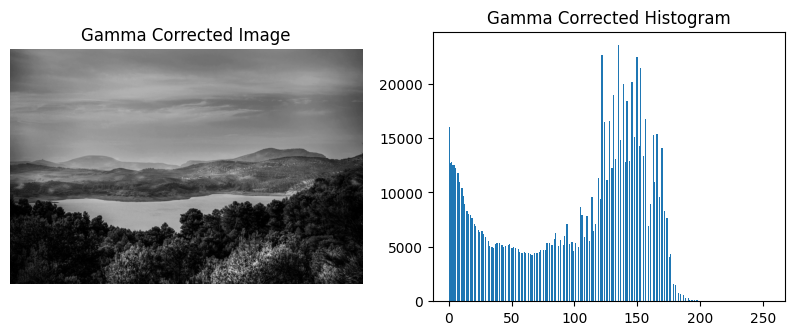

In [19]:
def func_gamma(img, gamma):
    return np.power(img, 1 / gamma).astype(int)

img = mpimg.imread('images/q2.jpg')
gamma_img = func_gamma(img, 0.9)
gamma_hist = histogram(gamma_img)
fig = plt.figure(figsize=(10, 3.5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.axis('off')
ax1.title.set_text('Gamma Corrected Image')
ax2.title.set_text('Gamma Corrected Histogram')
ax1.imshow(gamma_img, cmap='gray', vmin=0, vmax=255)
ax2.hist(list(range(0, 256)), weights=gamma_hist, bins=256)
plt.show()

e. (5 points) You now have three processed images; FSCS, logarithmic range compression
followed by FSCS, and gamma correction. Display the original image and the three
processed images in a 2x2 grid with labels. Analyze these three processed images.
Which of these three algorithms performs best? Give a brief reasoning on why that
algorithm performs best for q2.jpg.

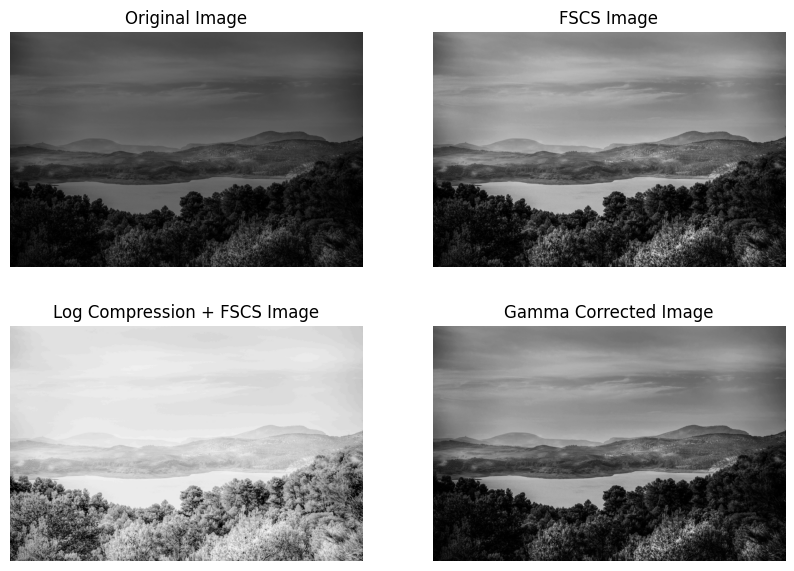

In [20]:
img = mpimg.imread('images/q2.jpg')
fscs_img = func_fscs(img)
log_img = func_fscs(func_logContCompression(img, 1.1))
gamma_img = func_gamma(img, 0.9)
fig = plt.figure(figsize=(10, 7))
ax = []
for i in range(4):
    ax.append(fig.add_subplot(2,2,i+1))
    ax[i].axis('off')
ax[0].title.set_text('Original Image')
ax[1].title.set_text('FSCS Image')
ax[2].title.set_text('Log Compression + FSCS Image')
ax[3].title.set_text('Gamma Corrected Image')
ax[0].imshow(img, cmap='gray', vmin=0, vmax=255)
ax[1].imshow(fscs_img, cmap='gray', vmin=0, vmax=255)
ax[2].imshow(log_img, cmap='gray', vmin=0, vmax=255)
ax[3].imshow(gamma_img, cmap='gray', vmin=0, vmax=255)
plt.show()

## Problem 3 - Binary Image Morphology (30 points)

a. (5 points) Read both the images in grayscale. Before running binary morphological
operations on the images, we need to binarize the images. Thus, run thresholding on
both the images with a suitable threshold. Display the two thresholded images side by
side. Which image is thresholding more effective on? For the subsequent parts of this
question, you will be working with these thresholded images, and not the original
images.

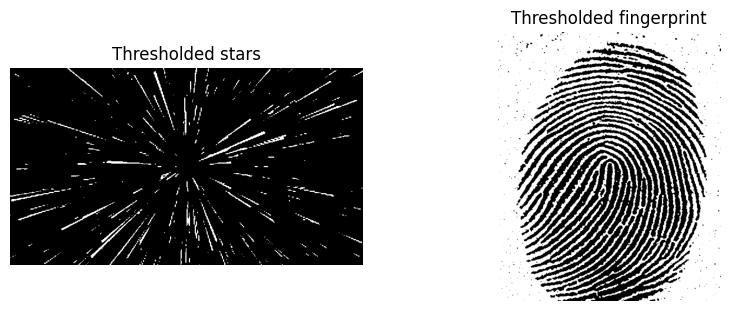

In [21]:
def threshold(img, T=None):
    thresholded = img.copy()
    rows = img.shape[0]
    cols = img.shape[1]
    if T is None:
        T = (np.amax(img) + np.amin(img)) / 2
    for i in range(rows):
        for j in range(cols):
            if (thresholded[i][j] >= T):
                thresholded[i][j] = 1
            else:
                thresholded[i][j] = 0
    return thresholded

stars = grayscale(mpimg.imread('images/stars.jpg'))
fingerprint = grayscale(mpimg.imread('images/fingerprint.jpg'))
t_stars = threshold(stars)
t_fingerprint = threshold(fingerprint)
fig = plt.figure(figsize=(10, 3.5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.axis('off')
ax2.axis('off')
ax1.title.set_text('Thresholded stars')
ax2.title.set_text('Thresholded fingerprint')
ax1.imshow(t_stars, cmap='gray', vmin=0, vmax=1)
ax2.imshow(t_fingerprint, cmap='gray', vmin=0, vmax=1)
plt.show()

b. (10 points) Write two functions “func_dilate()” and “func_erode”. Both of the functions
should take two input arguments, the image and width of the square window, and give
one output image. You can use padarray, im2col, reshape, max and min. You cannot use
any for or while loops in your program. Display the dilated and eroded images of both
stars.jpg and fingerprint.jpg (thresholded images) in a 2x2 grid with labels.

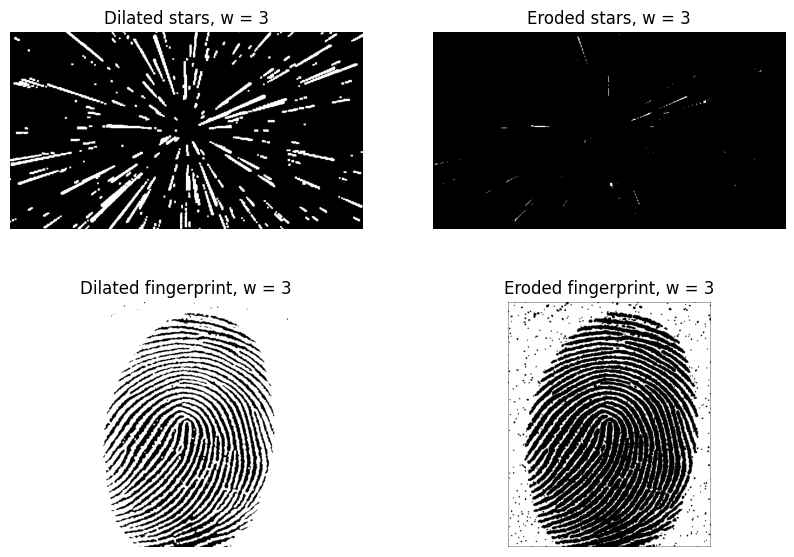

In [22]:
# im2col doesn't exist in python; so I am using np.lib.stride_tricks.sliding_window_view, which essentially
# does the same job as im2col after reshaping the outputted windows

def func_dilate(img, width):
    rows = img.shape[0]
    cols = img.shape[1]
    padded = np.pad(array=img, pad_width=int(width / 2), mode='constant')
    windows = np.lib.stride_tricks.sliding_window_view(padded, (width, width))
    return windows.reshape(rows, cols, 1, width * width).max(axis=3).reshape(rows, cols)

def func_erode(img, width):
    rows = img.shape[0]
    cols = img.shape[1]
    padded = np.pad(array=img, pad_width=int(width / 2), mode='constant')
    windows = np.lib.stride_tricks.sliding_window_view(padded, (width, width))
    return windows.reshape(rows, cols, 1, width * width).min(axis=3).reshape(rows, cols)

window_width = 3
stars = grayscale(mpimg.imread('images/stars.jpg'))
fingerprint = grayscale(mpimg.imread('images/fingerprint.jpg'))
t_stars = threshold(stars)
t_fingerprint = threshold(fingerprint)
d_stars = func_dilate(t_stars, window_width)
e_stars = func_erode(t_stars, window_width)
d_fingerprint = func_dilate(t_fingerprint, window_width)
e_fingerprint = func_erode(t_fingerprint, window_width)
fig = plt.figure(figsize=(10, 7))
ax = []
for i in range(4):
    ax.append(fig.add_subplot(2,2,i+1))
    ax[i].axis('off')
ax[0].title.set_text('Dilated stars, w = ' + str(window_width))
ax[1].title.set_text('Eroded stars, w = ' + str(window_width))
ax[2].title.set_text('Dilated fingerprint, w = ' + str(window_width))
ax[3].title.set_text('Eroded fingerprint, w = ' + str(window_width))
ax[0].imshow(d_stars, cmap='gray', vmin=0, vmax=1)
ax[1].imshow(e_stars, cmap='gray', vmin=0, vmax=1)
ax[2].imshow(d_fingerprint, cmap='gray', vmin=0, vmax=1)
ax[3].imshow(e_fingerprint, cmap='gray', vmin=0, vmax=1)
plt.show()

c. (5 points) By slightly modifying “func_dilate” and “func_erode”, write functions for open,
close, open-close, close-open and median. Run fingerprint.jpg (thresholded) through each of
these five functions and display the five output images in a 1x5 grid with labels.

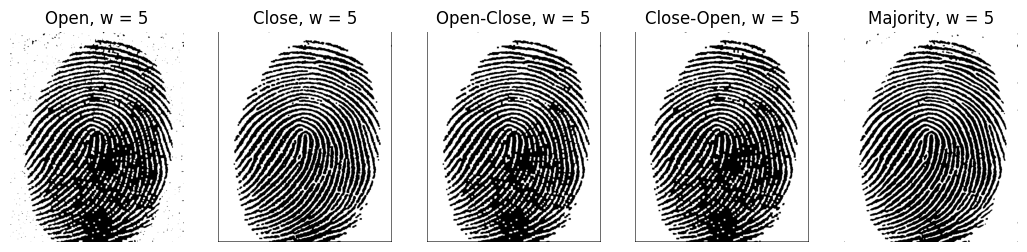

In [23]:
def func_open(img, width):
    return func_dilate(func_erode(img, width), width)

def func_close(img, width):
    return func_erode(func_dilate(img, width), width)

def func_open_close(img, width):
    return func_open(func_close(img, width), width)

def func_close_open(img, width):
    return func_close(func_open(img, width), width)

def func_majority(img, width):
    rows = img.shape[0]
    cols = img.shape[1]
    padded = np.pad(array=img, pad_width=int(width / 2), mode='constant')
    windows = np.lib.stride_tricks.sliding_window_view(padded, (width, width))
    return np.median(windows.reshape(rows, cols, 1, width * width), axis=3).reshape(rows, cols)

window_width = 5
fingerprint = grayscale(mpimg.imread('images/fingerprint.jpg'))
t_fingerprint = threshold(fingerprint)
fig = plt.figure(figsize=(13, 3))
ax = []
for i in range(5):
    ax.append(fig.add_subplot(1,5,i+1))
    ax[i].axis('off')
ax[0].title.set_text('Open, w = ' + str(window_width))
ax[1].title.set_text('Close, w = ' + str(window_width))
ax[2].title.set_text('Open-Close, w = ' + str(window_width))
ax[3].title.set_text('Close-Open, w = ' + str(window_width))
ax[4].title.set_text('Majority, w = ' + str(window_width))
ax[0].imshow(func_open(t_fingerprint, window_width), cmap='gray', vmin=0, vmax=1)
ax[1].imshow(func_close(t_fingerprint, window_width), cmap='gray', vmin=0, vmax=1)
ax[2].imshow(func_open_close(t_fingerprint, window_width), cmap='gray', vmin=0, vmax=1)
ax[3].imshow(func_close_open(t_fingerprint, window_width), cmap='gray', vmin=0, vmax=1)
ax[4].imshow(func_majority(t_fingerprint, window_width), cmap='gray', vmin=0, vmax=1)
plt.show()

d. (5 points) Generate a clean binary image from the thresholded fingerprint.jpg image by
removing blobs and holes. Use a combination of your erode, dilate, open or close
operations for the same. With this clean binary image, generate a boundary of the
object. Display the boundary image and the thresholded fingerprint.jpg image side by side.

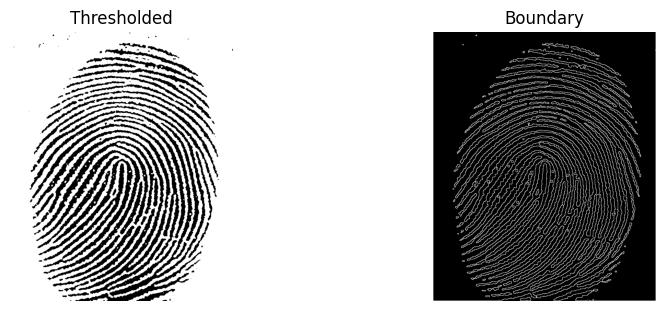

In [24]:
fingerprint = grayscale(mpimg.imread('images/fingerprint.jpg'))
t_fingerprint = threshold(fingerprint, 90)
clean = func_open(func_close(func_open(func_close(func_open(t_fingerprint, 3), 3), 3), 3), 3)
dilated = func_dilate(clean, 3)
boundary = dilated - clean
fig = plt.figure(figsize=(10, 3.5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.axis('off')
ax2.axis('off')
ax1.title.set_text('Thresholded')
ax2.title.set_text('Boundary')
ax1.imshow(t_fingerprint, cmap='gray', vmin=0, vmax=1)
ax2.imshow(boundary, cmap='gray', vmin=0, vmax=1)
plt.show()

e. (5 points) Write a function “func_boundaryLength()” to calculate the length of the
boundary, and report the boundary length.

In [25]:
def func_boundaryLength(boundary_img):
    # count the number of pixels that make up boundary lines
    return np.count_nonzero(boundary_img)

fingerprint = grayscale(mpimg.imread('images/fingerprint.jpg'))
t_fingerprint = threshold(fingerprint)
clean = func_close_open(func_close_open(func_close_open(func_close_open(func_close_open(t_fingerprint, 5), 5), 5), 5), 5)
dilated = func_dilate(clean, 5)
boundary = dilated - t_fingerprint

print('Boundary Length (pixels):', func_boundaryLength(boundary))

Boundary Length (pixels): 82813


## Problem 4 - Bit-Planes (15 points)

a. (5 points) Read the image q4.jpg. Modify it using a 3-bit quantization bar. Essentially, the
intensity of each pixel should be represented by 3 bits instead of the original 8 bits.
Display the 3-bit image and the original image side by side.

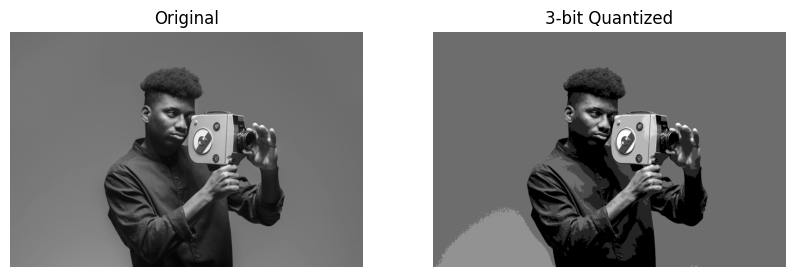

In [26]:
img = grayscale(mpimg.imread('images/q4.jpg'))
quantized = img.copy()
# map pixels from 8 bits to 3 bits --> 2^8 / 2^5 = 2^3
# [0, 255] -> [0, 7]
quantized = (quantized / (2**5)).astype(int)
fig = plt.figure(figsize=(10, 3.5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.axis('off')
ax2.axis('off')
ax1.title.set_text('Original')
ax2.title.set_text('3-bit Quantized')
ax1.imshow(img, cmap='gray', vmin=0, vmax=255)
ax2.imshow(quantized, cmap='gray', vmin=0, vmax=7)
plt.show()

b. (5 points) Use bitget to extract each of the 8 bit-planes, and display the 8 bit-planes in a
2x4 grid with labels.

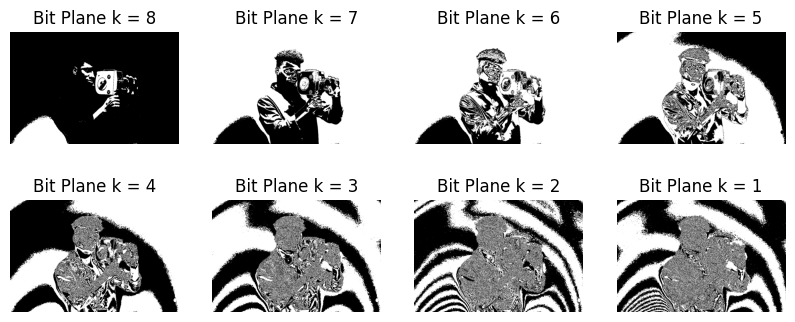

In [27]:
img = grayscale(mpimg.imread('images/q4.jpg'))
rows = img.shape[0]
cols = img.shape[1]
# there is no bitget function in python so I am just unpacking the bits and indexing the bit-planes
unpacked = np.unpackbits(img.astype(np.uint8)).reshape(rows, cols, 8)
fig = plt.figure(figsize=(10, 4))
ax = []
for i in range(8):
    ax.append(fig.add_subplot(2,4,i+1))
    ax[i].axis('off')
    ax[i].title.set_text('Bit Plane k = ' + str(8 - i))
    ax[i].imshow(unpacked[:, :, i], cmap='gray')
plt.show()

c. (5 points) We are now going to play around with hidden information in images. Add some
hidden information in bit-plane 1 and reconstruct the image. Generate seven more
images by adding some hidden information in bit-plane 2, bit-plane 3 and so on. You will
have a total of eight images at the end of this. Display all the eight images with “hidden
information” in a 2x4 grid with proper labels. Are any of these images perceptually
distorted compared to the original image? If so, which ones?

Answer: Yes, when modifying bits 8, 7, 6, 5 we saw a significant (although decreasing) amount of distortion. The higher the bit plane that is modified, the more distortion appears in the restored image. This makes sense since modifying a more significant bit makes much more difference to the intensity of that pixel, so we don't see that much distortion when modifying lower bits. The hidden information applied to each bitplane was a bitplane corresponding to a centered circle. 

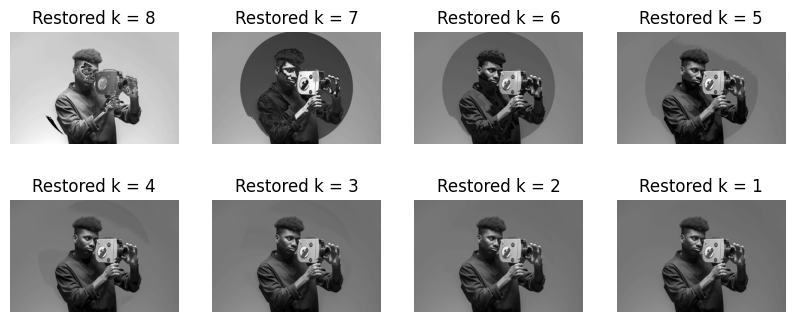

In [28]:
img = grayscale(mpimg.imread('images/q4.jpg'))
rows = img.shape[0]
cols = img.shape[1]
# there is no bitget function in python so I am just unpacking the bits and indexing the bit-planes
unpacked = np.unpackbits(img.astype(np.uint8)).reshape(rows, cols, 8)
# hidden information is a bit plane corresponding to a centered circle (radius = min(rows, cols) / )
hidden_info = np.fromfunction(lambda i, j: (i-rows/2)**2 + (j-cols/2)**2 - (min(rows, cols) / 2)**2, (rows, cols), dtype=int).astype(int).clip(0, 1)
fig = plt.figure(figsize=(10, 4))
ax = []
for i in range(8):
    ax.append(fig.add_subplot(2,4,i+1))
    ax[i].axis('off')
    ax[i].title.set_text('Restored k = ' + str(8 - i))
    restored = unpacked.copy()
    restored[:, :, i] = np.minimum(restored[:, :, i], hidden_info)
    restored = np.packbits(restored.reshape(rows * cols * 8)).reshape(rows, cols)
    ax[i].imshow(restored, cmap='gray')
plt.show()